This script will compile and organize the data of every patient in a more understable way

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import scipy.io as sio
import mne 
import os
from sklearn.metrics import roc_curve, auc
from functions.preprocessing import *

In [ ]:
patients = [
'sub-HUP139',
'sub-HUP180',
'sub-HUP146',
'sub-HUP177',
'sub-HUP185',
'sub-HUP117',
'sub-HUP173',
'sub-HUP160',
'sub-HUP148',
'sub-HUP150',
'sub-HUP130',
'sub-HUP141',
'sub-HUP144',
'sub-HUP164',
'sub-HUP142',
'sub-HUP172',
'sub-HUP151',
'sub-HUP171',
'sub-HUP187',
]  #Patients to process
percentiles=[0.9,0.95,0.99]
ref_data=0
bands = ['alpha','beta','theta','full_gamma','low_gamma','high_gamma1']
method_exp = 'plv'
norm = ['','distance_']


output_path="/home/pablo/works/dev_thesis_SEEG/outputs_t30/"
main_path='/home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/'




# Define a MultiIndex for patients, percentiles, and norm
index = pd.MultiIndex.from_product(
    [patients, percentiles, norm],
    names=["Patient", "Percentile", "Normalization"]
)
columns = bands
results_df = pd.DataFrame(index=index, columns=columns)

# Process each patient
for patient in patients:
    doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
    raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
    events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
    channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
    raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)


    # Process each band, percentile, and normalization type
    for percentile in percentiles:
        for n in norm:
            for band in bands:
                try:
                    # Load density probabilities
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}_{method_exp}.csv"
                    )
                    probs = pd.read_csv(probs_path)

                    # Prepare for AUC calculation
                    normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                    y_true = np.array([1 if contact in inside_network else 0 for contact in normalized_densities.keys()])
                    y_scores = np.array([score for score in normalized_densities.values()])
                    

                     # Step 4: Calculate ROC curve and AUC
                    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
                    auc_score = auc(fpr, tpr)
                    # Calculate AUC
                    # auc_score = roc_auc_score(y_true, y_scores)

                    # Store the AUC score
                    results_df.loc[(patient, percentile, n), band] = auc_score
                except Exception as e:
                    print()
                    print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                    results_df.loc[(patient, percentile, n), band] = None

# Save results to CSV
results_df.to_csv(f"{output_path}/auc_scores_summary_{method_exp}_t30.csv")
print("AUC scores saved to", f"{output_path}/{method_exp}_scores_summary.csv")


# Display DataFrame
print(results_df)

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP139/ses-presurgery/ieeg/sub-HUP139_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 195583  =      0.000 ...   190.999 secs...


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP180/ses-presurgery/ieeg/sub-HUP180_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 116223  =      0.000 ...   226.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP146/ses-presurgery/ieeg/sub-HUP146_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 248831  =      0.000 ...   242.999 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP177/ses-presurgery/ieeg/sub-HUP177_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP185/ses-presurgery/ieeg/sub-HUP185_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117247  =      0.000 ...   228.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP117/ses-presurgery/ieeg/sub-HUP117_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157999  =      0.000 ...   315.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP173/ses-presurgery/ieeg/sub-HUP173_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 58111  =      0.000 ...   226.996 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP160/ses-presurgery/ieeg/sub-HUP160_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 237567  =      0.000 ...   231.999 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP148/ses-presurgery/ieeg/sub-HUP148_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95743  =      0.000 ...   186.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP150/ses-presurgery/ieeg/sub-HUP150_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 109567  =      0.000 ...   213.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP130/ses-presurgery/ieeg/sub-HUP130_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 246783  =      0.000 ...   240.999 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP141/ses-presurgery/ieeg/sub-HUP141_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP144/ses-presurgery/ieeg/sub-HUP144_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145919  =      0.000 ...   284.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP164/ses-presurgery/ieeg/sub-HUP164_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 251903  =      0.000 ...   245.999 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP142/ses-presurgery/ieeg/sub-HUP142_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132607  =      0.000 ...   258.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP172/ses-presurgery/ieeg/sub-HUP172_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123391  =      0.000 ...   240.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP151/ses-presurgery/ieeg/sub-HUP151_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129023  =      0.000 ...   251.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP171/ses-presurgery/ieeg/sub-HUP171_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 116735  =      0.000 ...   227.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP187/ses-presurgery/ieeg/sub-HUP187_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 111615  =      0.000 ...   217.998 secs...


/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

AUC scores saved to /home/pablo/works/dev_thesis_SEEG/outputs_t30//plv_scores_summary.csv
                                        alpha      beta     theta full_gamma  \
Patient    Percentile Normalization                                            
sub-HUP139 0.90                      0.471154   0.34003  0.347368   0.329154   
                      distance_       0.28347  0.344945  0.324454   0.313525   
           0.95                      0.544643  0.553763  0.529412   0.406522   
                      distance_       0.39276  0.312842  0.394809   0.325137   
           0.99                      0.248848    0.4375  0.414634   0.451058   
...                                       ...       ...       ...        ...   
sub-HUP187 0.90       distance_      0.216732  0.424658  0.238258   0.205479   
           0.95                      0.308201  0.584906  0.056818   0.387649   
                      distance_      0.294521  0.267123  0.335404   0.255382   
           0.99               

/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = auc_score
/tmp/ipykernel_2449362/1050380851.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[

#### Mann-Whitney test

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

results = []

patients = [
'sub-HUP141'
]

# Loop through each patient
for patient in patients:
    doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
    raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
    events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
    channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
    raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)

    for band in bands:
        for p in percentiles:
            for n in norm:
                try:
                    # Load the density data
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}.csv")
                    probs = pd.read_csv(probs_path)
                    probs.columns = ['Contact', 'Normalized density']
                    # Separate contacts into SOZ and non-SOZ
                    probs['Group'] = probs['Contact'].apply(lambda x: 'SOZ' if x in inside_network else 'Non-SOZ')
                    
                    # Calculate probabilities for both groups
                    soz_probs = probs[probs['Group'] == 'SOZ']['Normalized density']
                    non_soz_probs = probs[probs['Group'] == 'Non-SOZ']['Normalized density']
                    
                    # Perform Mann-Whitney U test
                    stat, p_value = mannwhitneyu(soz_probs, non_soz_probs, alternative='two-sided')
                    
                    # Save results
                    results.append({
                        'Patient': patient,
                        'Band': band,
                        'Norm': n,
                        'Percentile': p,
                        'Mann-Whitney U': stat,
                        'p-value': p_value,
                        'SOZ Mean Density': soz_probs.mean(),
                        'Non-SOZ Mean Density': non_soz_probs.mean()
                    })
                    
                    # Visualize the distributions
                    plt.figure(figsize=(8, 5))
                    sns.histplot(soz_probs, kde=True, color='blue', label='SOZ', stat="density", bins=10)
                    sns.histplot(non_soz_probs, kde=True, color='orange', label='Non-SOZ', stat="density", bins=10)
                    plt.title(f"{patient} - {band} - p-value: {p_value:.3e}", fontsize=14)
                    plt.xlabel("Normalized Density", fontsize=12)
                    plt.ylabel("Density", fontsize=12)
                    plt.legend(title="Group", fontsize=12)
                    plt.tight_layout()
                    # plt.savefig(f"outputs/{patient}_{band}_{n}_percentile_{p}_density_plot.png")
                    plt.close()
                except FileNotFoundError:
                    print(f"File not found for {patient}, {band}, {n}, percentile {p}.")
                except Exception as e:
                    print(f"Error processing {patient}, {band}, {n}, percentile {p}: {e}")

# Convert results into a DataFrame for review
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv(f"{output_path}/soz_vs_non_soz_analysis.csv", index=False)


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP141/ses-presurgery/ieeg/sub-HUP141_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...


### ROC CURVE

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary to store ROC curve data
roc_curve_data = {}

# Process each patient
for patient in patients:
    doc_file_data = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv', sep='\t')
    raw = mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data], preload=True)
    xyz_loc = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv', sep='\t')
    events = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_events.tsv'), sep='\t')
    channels = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_channels.tsv'), sep='\t')
    raw, xyz_loc, inside_network = format_data_database(raw, xyz_loc, events=events, channels=channels)

    for percentile in percentiles:
        for n in norm:
            for band in bands:
                try:
                    # Load density probabilities
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}_{method_exp}.csv"
                    )
                    probs = pd.read_csv(probs_path)
                    
                    # Prepare for AUC calculation
                    normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                    y_true = np.array([1 if contact in inside_network else 0 for contact in normalized_densities.keys()])
                    y_scores = np.array([score for score in normalized_densities.values()])

                    # Calculate ROC curve and AUC
                    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
                    auc_score = auc(fpr, tpr)

                    # Store ROC curve data
                    roc_curve_data[(patient, percentile, n, band)] = {
                        "fpr": fpr,
                        "tpr": tpr,
                        "auc": auc_score
                    }
                except Exception as e:
                    print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                    roc_curve_data[(patient, percentile, n, band)] = None

# Save ROC curve data for later analysis
import pickle
with open(f"{output_path}/roc_curve_data.pkl", "wb") as f:
    pickle.dump(roc_curve_data, f)
print("ROC curve data saved.")


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP139/ses-presurgery/ieeg/sub-HUP139_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 195583  =      0.000 ...   190.999 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP180/ses-presurgery/ieeg/sub-HUP180_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 116223  =      0.000 ...   226.998 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP146/ses-presurgery/ieeg/sub-HUP146_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 248831  =      0.000 ...   242.999 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP177/ses-presurgery/ieeg/sub-HUP177_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP185/ses-presurgery/ieeg/sub-HUP185_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117247  =      0.000 ...   228.998 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true,

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP117/ses-presurgery/ieeg/sub-HUP117_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157999  =      0.000 ...   315.998 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP173/ses-presurgery/ieeg/sub-HUP173_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 58111  =      0.000 ...   226.996 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP160/ses-presurgery/ieeg/sub-HUP160_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 237567  =      0.000 ...   231.999 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP148/ses-presurgery/ieeg/sub-HUP148_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95743  =      0.000 ...   186.998 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP150/ses-presurgery/ieeg/sub-HUP150_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 109567  =      0.000 ...   213.998 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP130/ses-presurgery/ieeg/sub-HUP130_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 246783  =      0.000 ...   240.999 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP141/ses-presurgery/ieeg/sub-HUP141_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true,

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP144/ses-presurgery/ieeg/sub-HUP144_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145919  =      0.000 ...   284.998 secs...


/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Error processing sub-HUP144, band alpha, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP144/ref_0/percentile_0.9/normalized_densities_alpha__aec.csv'
Error processing sub-HUP144, band beta, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP144/ref_0/percentile_0.9/normalized_densities_beta__aec.csv'
Error processing sub-HUP144, band theta, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP144/ref_0/percentile_0.9/normalized_densities_theta__aec.csv'
Error processing sub-HUP144, band full_gamma, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP144/ref_0/percentile_0.9/normalized_densities_full_gamma__aec.csv'
Error processing sub-HUP144, band low_gamma, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/

/home/pablo/miniconda3/envs/Epilep/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Error processing sub-HUP171, band alpha, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP171/ref_0/percentile_0.9/normalized_densities_alpha__aec.csv'
Error processing sub-HUP171, band beta, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP171/ref_0/percentile_0.9/normalized_densities_beta__aec.csv'
Error processing sub-HUP171, band theta, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP171/ref_0/percentile_0.9/normalized_densities_theta__aec.csv'
Error processing sub-HUP171, band full_gamma, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/dev_thesis_SEEG/outputs_t0//sub-HUP171/ref_0/percentile_0.9/normalized_densities_full_gamma__aec.csv'
Error processing sub-HUP171, band low_gamma, norm , percentile 0.9: [Errno 2] No such file or directory: '/home/pablo/works/

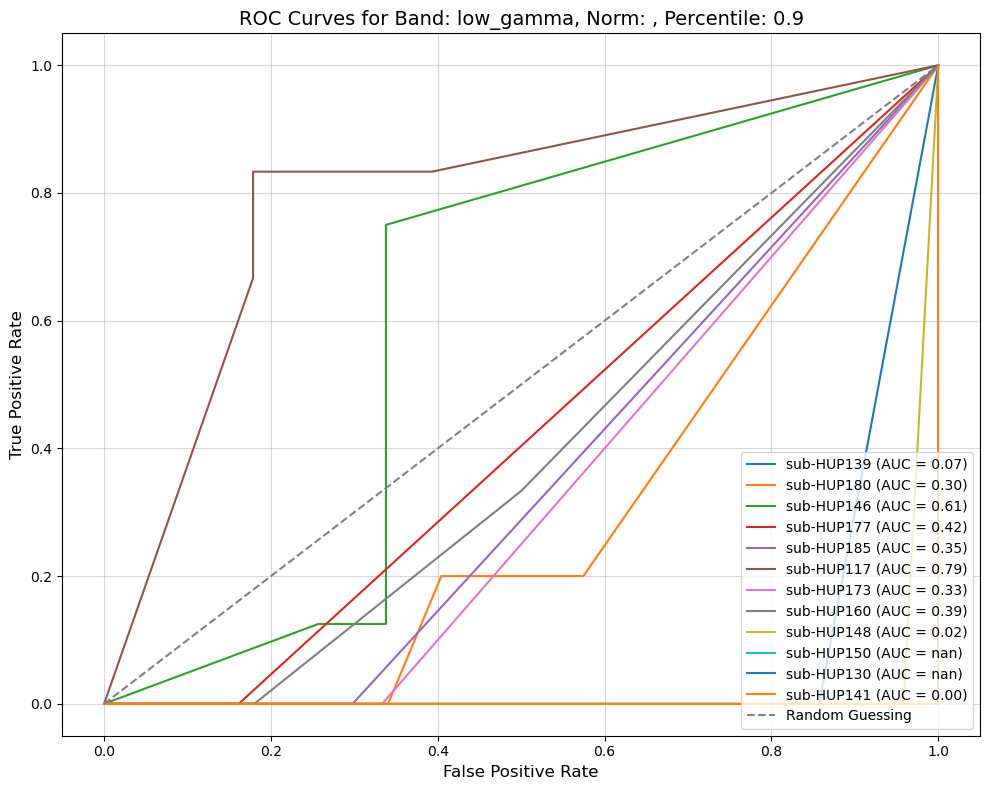

In [11]:
# Load ROC curve data
with open(f"{output_path}/roc_curve_data.pkl", "rb") as f:
    roc_curve_data = pickle.load(f)

# Select configuration for plotting
selected_band = "low_gamma"
selected_norm = ""
selected_percentile = 0.9

plt.figure(figsize=(10, 8))
for patient in patients:
    config_key = (patient, selected_percentile, selected_norm, selected_band)
    if config_key in roc_curve_data and roc_curve_data[config_key]:
        fpr = roc_curve_data[config_key]["fpr"]
        tpr = roc_curve_data[config_key]["tpr"]
        auc_score = roc_curve_data[config_key]["auc"]
        
        plt.plot(fpr, tpr, label=f"{patient} (AUC = {auc_score:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guessing')

# Customize the plot
plt.title(f"ROC Curves for Band: {selected_band}, Norm: {selected_norm}, Percentile: {selected_percentile}", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


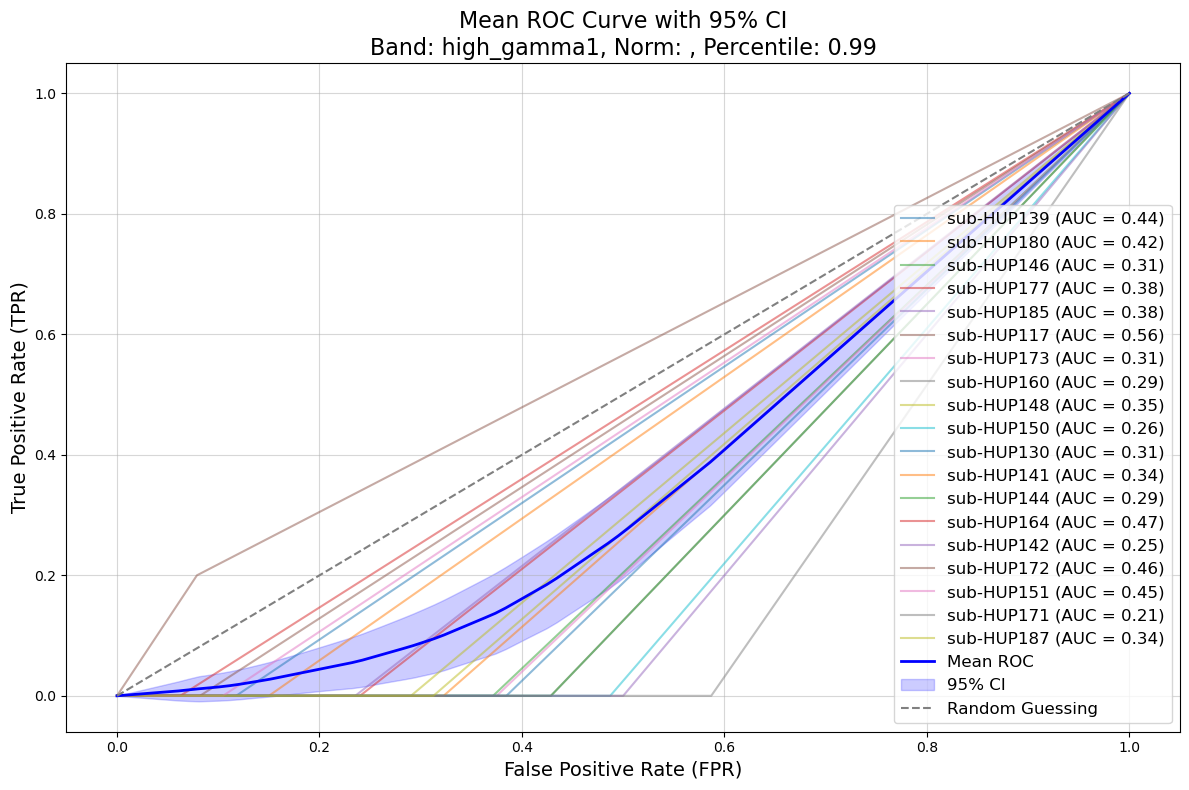

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Define a function to interpolate TPR for a common FPR range
def interpolate_roc_data(roc_curve_data, selected_band, selected_norm, selected_percentile):
    common_fpr = np.linspace(0, 1, 100)  # Common range for FPR
    tpr_values = []  # To store interpolated TPRs for each patient
    
    for patient in patients:
        config_key = (patient, selected_percentile, selected_norm, selected_band)
        if config_key in roc_curve_data and roc_curve_data[config_key]:
            fpr = roc_curve_data[config_key]["fpr"]
            tpr = roc_curve_data[config_key]["tpr"]
            # Interpolate TPR values for the common FPR range
            tpr_interp = np.interp(common_fpr, fpr, tpr)
            tpr_values.append(tpr_interp)
    
    return common_fpr, np.array(tpr_values)

# Load ROC curve data
with open(f"{output_path}/roc_curve_data.pkl", "rb") as f:
    roc_curve_data = pickle.load(f)

# Select configuration for plotting
selected_band = "high_gamma1"
selected_norm = ""
selected_percentile = 0.99

# Interpolate TPR data
common_fpr, tpr_values = interpolate_roc_data(roc_curve_data, selected_band, selected_norm, selected_percentile)

# Calculate mean TPR and confidence intervals
mean_tpr = np.mean(tpr_values, axis=0)
std_error = sem(tpr_values, axis=0)  # Standard error of the mean
lower_ci = mean_tpr - 1.96 * std_error  # 95% confidence interval lower bound
upper_ci = mean_tpr + 1.96 * std_error  # 95% confidence interval upper bound

# Plot individual ROC curves
plt.figure(figsize=(12, 8))
for patient_idx, patient in enumerate(patients):
    config_key = (patient, selected_percentile, selected_norm, selected_band)
    if config_key in roc_curve_data and roc_curve_data[config_key]:
        fpr = roc_curve_data[config_key]["fpr"]
        tpr = roc_curve_data[config_key]["tpr"]
        auc_score = roc_curve_data[config_key]["auc"]
        plt.plot(fpr, tpr, alpha=0.5, label=f"{patient} (AUC = {auc_score:.2f})")

# Plot mean ROC curve
plt.plot(common_fpr, mean_tpr, color='blue', label="Mean ROC", linewidth=2)

# Plot confidence intervals
plt.fill_between(common_fpr, lower_ci, upper_ci, color='blue', alpha=0.2, label="95% CI")

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guessing')

# Customize the plot
plt.title(f"Mean ROC Curve with 95% CI\nBand: {selected_band}, Norm: {selected_norm}, Percentile: {selected_percentile}", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


#### New metric

#### This metric will measure the absolute error of the method according to the coordinates set. 
1. Get the distance matrix
2. Get the electrodes above a threshold T
3. For every electrode above the threshold T, we select the minimal distance of (lets say a) to the electrodes in the soz. 
    If a belongs to the soz, the minimal distance will be 0. If not, but it is closer, distance is going to be a low number. If the algorithm made a huge mistake, distance is going to be so high. 
4. Every iteration add the minimal distance to a error E. 

When the algorithms works properly, error e is close to 0.

In [5]:
  #Normalize between 0 and 1
def normalize_matrix(matrix):
    min_value = np.min(matrix)
    max_value = np.max(matrix)
    normalized_matrix = (matrix - min_value) / (max_value - min_value)
    return normalized_matrix


from sklearn.metrics import pairwise_distances

In [30]:
axises=['r', 'a', 's']
# patients = ['sub-HUP185']
# percentiles=[0.99]
# ref_data=0
# bands = ['beta']
# norm = ['distance_']
# Define a MultiIndex for patients, percentiles, and norm
index = pd.MultiIndex.from_product(
    [patients, percentiles, norm],
    names=["Patient", "Percentile", "Normalization"]
)
columns = bands
results_df = pd.DataFrame(index=index, columns=columns)
T=0.5

# Process each patient
for patient in patients:
    doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
    raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
    events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
    channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
    raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)


    # Process each band, percentile, and normalization type
    for percentile in percentiles:
        for n in norm:
            for band in bands:
                try:
                    # Load density probabilities
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}_{method_exp}.csv"
                    )
                    probs = pd.read_csv(probs_path)

                    # Prepare for AUC calculation
                    normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                    # Get the electrodes wich normalized density is greater than T
                    normalized_densities_ = {k:v for k,v in normalized_densities.items() if v>T}
                    pred=list(normalized_densities_.keys())

                    # Get the distance matrix  #Get the euclidean distance between each pair of electrodes
                    distances = pairwise_distances(xyz_loc[axises])
                    # Normalize the distances
                    normalized_distances = normalize_matrix(distances)

                    #Indexes
                    index_pred=list(xyz_loc.where(xyz_loc['formatted_label'].isin(pred)).dropna().index)
                    index_inside_network = list(xyz_loc.where(xyz_loc['formatted_label'].isin(inside_network)).dropna().index)


                    #Submatrix of distances
                    sub_M=normalized_distances[index_pred][:,index_inside_network]
                    minimum_distances=np.min(sub_M,axis=1)

                    #Final score 
                    score=np.sum(minimum_distances)
                    results_df.loc[(patient, percentile, n), band] = score
                except Exception as e:
                    print()
                    print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                    results_df.loc[(patient, percentile, n), band] = None

# Save results to CSV
results_df.to_csv(f"{output_path}/min_dist_scores_summary_{method_exp}T{T}.csv")
print("AUC scores saved to", f"{output_path}/min_dist_scores_summary_{method_exp}{T}.csv")

# # Display DataFrame
print(results_df)

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP139/ses-presurgery/ieeg/sub-HUP139_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 195583  =      0.000 ...   190.999 secs...


Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP180/ses-presurgery/ieeg/sub-HUP180_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 116223  =      0.000 ...   226.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP146/ses-presurgery/ieeg/sub-HUP146_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 248831  =      0.000 ...   242.999 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP177/ses-presurgery/ieeg/sub-HUP177_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP185/ses-presurgery/ieeg/sub-HUP185_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117247  =      0.000 ...   228.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP117/ses-presurgery/ieeg/sub-HUP117_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157999  =      0.000 ...   315.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP173/ses-presurgery/ieeg/sub-HUP173_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 58111  =      0.000 ...   226.996 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP160/ses-presurgery/ieeg/sub-HUP160_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 237567  =      0.000 ...   231.999 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP148/ses-presurgery/ieeg/sub-HUP148_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95743  =      0.000 ...   186.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP150/ses-presurgery/ieeg/sub-HUP150_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 109567  =      0.000 ...   213.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP130/ses-presurgery/ieeg/sub-HUP130_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 246783  =      0.000 ...   240.999 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP141/ses-presurgery/ieeg/sub-HUP141_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP144/ses-presurgery/ieeg/sub-HUP144_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145919  =      0.000 ...   284.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP164/ses-presurgery/ieeg/sub-HUP164_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 251903  =      0.000 ...   245.999 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP142/ses-presurgery/ieeg/sub-HUP142_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132607  =      0.000 ...   258.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP172/ses-presurgery/ieeg/sub-HUP172_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123391  =      0.000 ...   240.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP151/ses-presurgery/ieeg/sub-HUP151_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129023  =      0.000 ...   251.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP171/ses-presurgery/ieeg/sub-HUP171_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 116735  =      0.000 ...   227.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP187/ses-presurgery/ieeg/sub-HUP187_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 111615  =      0.000 ...   217.998 secs...


/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

AUC scores saved to /home/pablo/works/dev_thesis_SEEG/outputs_t30//min_dist_scores_summary_plv0.5.csv
                                         alpha      beta      theta  \
Patient    Percentile Normalization                                   
sub-HUP139 0.90                       8.844231  8.502643   8.844231   
                      distance_       9.508867  6.764055    5.01973   
           0.95                       1.476425   8.37503  10.320656   
                      distance_        5.11759  5.399594   3.950871   
           0.99                       1.305114  1.305114   1.305114   
...                                        ...       ...        ...   
sub-HUP187 0.90       distance_       7.610377  4.734926   6.722322   
           0.95                      10.792972  6.312545   5.028402   
                      distance_       4.773933  2.995259    3.72807   
           0.99                       3.228038  3.228038   4.098966   
                      distance_       6.496897

/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile, n), band] = score
/tmp/ipykernel_2449362/3994695594.py:60: PerformanceWarning: indexing past lexsort depth may impact performance.
  results_df.loc[(patient, percentile

#### soz vs non-soz BOXPLOT

In [59]:
import matplotlib.pyplot as plt


#Generating a boxplot for the results
patients = [
'sub-HUP185'
]
ref_data = 0
percentile=0.99
norm = '_distance'
band = 'beta'

soz_densities =[]
non_soz_densities = []

# Process each patient
for patient in patients:
    doc_file_data = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv', sep='\t')
    raw = mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data], preload=True)
    xyz_loc = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv', sep='\t')
    events = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_events.tsv'), sep='\t')
    channels = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_channels.tsv'), sep='\t')
    raw, xyz_loc, inside_network = format_data_database(raw, xyz_loc, events=events, channels=channels)


    
    try:
        # Load density probabilities
        probs_path = (
            f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
            f"normalized_densities_{band}_{n}.csv"
        )
        probs = pd.read_csv(probs_path)
        
        # Prepare for AUC calculation        
        normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()

        # Separate contacts into SOZ and non-SOZ accordint to inside_network
        soz_densities.extend([normalized_densities[contact] for contact in inside_network])
        non_soz_densities.extend([normalized_densities[contact] for contact in normalized_densities if contact not in inside_network])
    
    except Exception as e:
        print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
        roc_curve_data[(patient, percentile, n, band)] = None

Extracting EDF parameters from /home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/sub-HUP185/ses-presurgery/ieeg/sub-HUP185_ses-presurgery_task-ictal_acq-seeg_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117247  =      0.000 ...   228.998 secs...


/tmp/ipykernel_81624/270083640.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([soz_densities, non_soz_densities], labels=['SOZ', 'Non-SOZ'])


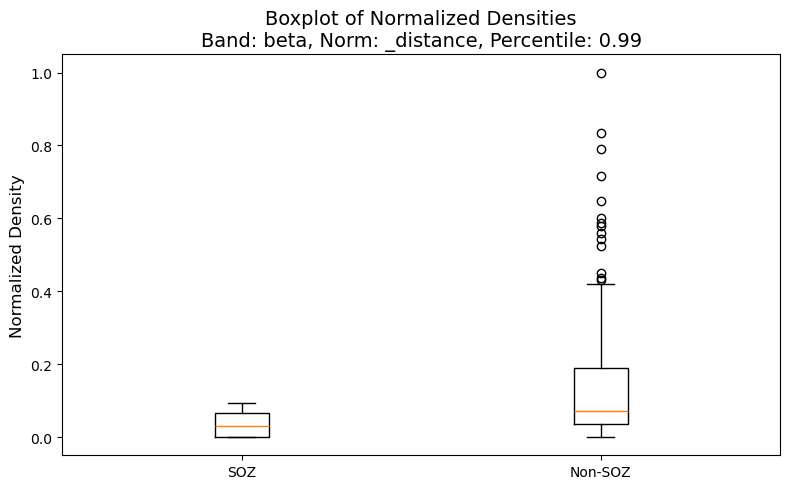

In [61]:

plt.figure(figsize=(8, 5))
plt.boxplot([soz_densities, non_soz_densities], labels=['SOZ', 'Non-SOZ'])
plt.title(f"Boxplot of Normalized Densities\nBand: {band}, Norm: {norm}, Percentile: {percentile}", fontsize=14)
plt.ylabel("Normalized Density", fontsize=12)
plt.tight_layout()
plt.show()


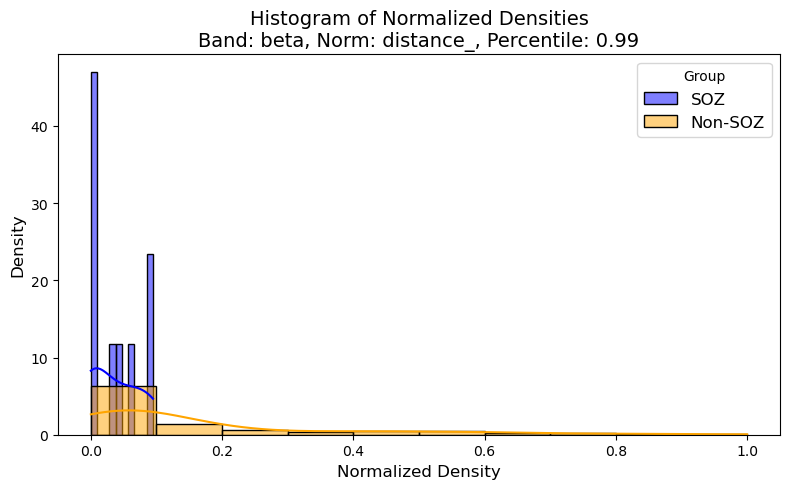

In [62]:
#Compare histogram distribution of SOZ and non-SOZ using sns 
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(soz_densities, kde=True, color='blue', label='SOZ', stat="density", bins=10)
sns.histplot(non_soz_densities, kde=True, color='orange', label='Non-SOZ', stat="density", bins=10)
plt.title(f"Histogram of Normalized Densities\nBand: {band}, Norm: {n}, Percentile: {percentile}", fontsize=14)
plt.xlabel("Normalized Density", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Group", fontsize=12)
plt.tight_layout()
plt.show()